In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
from time import process_time

from EDAspy.optimization import EMNA, EGNA, SPEDA, UMDAc, MultivariateKEDA, UnivariateKEDA
from EDAspy.benchmarks import ContinuousBenchmarkingCEC14


Bad key text.latex.preview in file c:\users\vicen\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\users\vicen\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\users\vicen\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jp

In [2]:
n = 10
max_it = 100
dead_it = 100
l = 1
alpha = 0.4
size_gen = 300

bench = ContinuousBenchmarkingCEC14(n)

In [3]:
umda = UMDAc(size_gen=size_gen, max_iter=max_it, dead_iter=dead_it, n_variables=n)
start_time = process_time()
result_umda = umda.minimize(bench.cec14_4, output_runtime=False)
umda_time = process_time() - start_time
print('Best cost:', result_umda.best_cost, '\tTime:', umda_time)

	NFVALS = 30000 F = 407.96747095475195
	X = [ -21.91377099   14.71359673 -116.15195467   -5.21332947   56.69133233
 -121.02228307    3.06652542   50.36283965   68.55149048  -31.88681787]
Best cost: 407.96747095475195 	Time: 23.140625


In [4]:
emna = EMNA(size_gen=size_gen, max_iter=max_it, dead_iter=dead_it, n_variables=n, landscape_bounds=(-100, 100))
start_time = process_time()
result_emna = emna.minimize(bench.cec14_4, output_runtime=False)
emna_time = process_time() - start_time
print('Best cost:', result_emna.best_cost, '\tTime:', emna_time)

	NFVALS = 30000 F = 7125.7294604134
	X = [ 32.67549984 -29.23681288   9.32118021 -34.08139357  47.28289193
 -99.01445224 -26.39225702 -56.37531491 -19.37752236 -51.22615169]
Best cost: 7125.7294604134 	Time: 23.921875


In [5]:
egna = EGNA(size_gen=size_gen, max_iter=max_it, dead_iter=dead_it, n_variables=n, landscape_bounds=(-100, 100))
start_time = process_time()
result_egna = egna.minimize(bench.cec14_4, output_runtime=False)
egna_time = process_time() - start_time
print('Best cost:', result_egna.best_cost, '\tTime:', egna_time)

	NFVALS = 30000 F = 427.08400556224245
	X = [ -35.06899317   38.8005939  -112.71652538  -28.30666006   32.85674707
 -106.26442299    8.52482065   38.4232738    61.07180752  -37.20390963]
Best cost: 427.08400556224245 	Time: 26.078125


In [6]:
speda = SPEDA(size_gen=size_gen, max_iter=max_it, dead_iter=dead_it, n_variables=n, landscape_bounds=(-100, 100), l=l)
start_time = process_time()
result_speda = speda.minimize(bench.cec14_4, output_runtime=False)
speda_time = process_time() - start_time
print('Best cost:', result_speda.best_cost, '\tTime:', speda_time)

	NFVALS = 30000 F = 408.9359541748589
	X = [ -25.33339979   -0.53495242 -115.71726657    5.70963109   57.40503847
 -121.13021379    3.09795994   50.06593469   67.91087809  -26.03070588]
Best cost: 408.9359541748589 	Time: 34.53125


In [7]:
keda = UnivariateKEDA(size_gen=size_gen, max_iter=max_it, dead_iter=dead_it, n_variables=n)
start_time = process_time()
result_u_keda = keda.minimize(bench.cec14_4, output_runtime=False)
u_keda_time = process_time() - start_time
print('Best cost:', result_u_keda.best_cost, '\tTime:', u_keda_time)

	NFVALS = 30000 F = 404.6815776707767
	X = [ -38.18488886   45.6664974  -114.38235704  -40.8270725    19.48090636
 -121.59794504    9.50300924   51.01966835   66.91282162  -27.42156611]
Best cost: 404.6815776707767 	Time: 23.109375


In [8]:
keda = MultivariateKEDA(size_gen=size_gen, max_iter=max_it, dead_iter=dead_it, n_variables=n, landscape_bounds=(-100, 100), l=l)
start_time = process_time()
result_keda = keda.minimize(bench.cec14_4, output_runtime=False)
keda_time = process_time() - start_time
print('Best cost:', result_keda.best_cost, '\tTime:', keda_time)

	NFVALS = 30000 F = 407.3726592145496
	X = [ -22.84932411   24.37927023 -117.4310807    -9.49216533   53.32462945
 -121.35643138    4.34512612   50.67325363   68.80785681  -34.51073545]
Best cost: 407.3726592145496 	Time: 130.796875


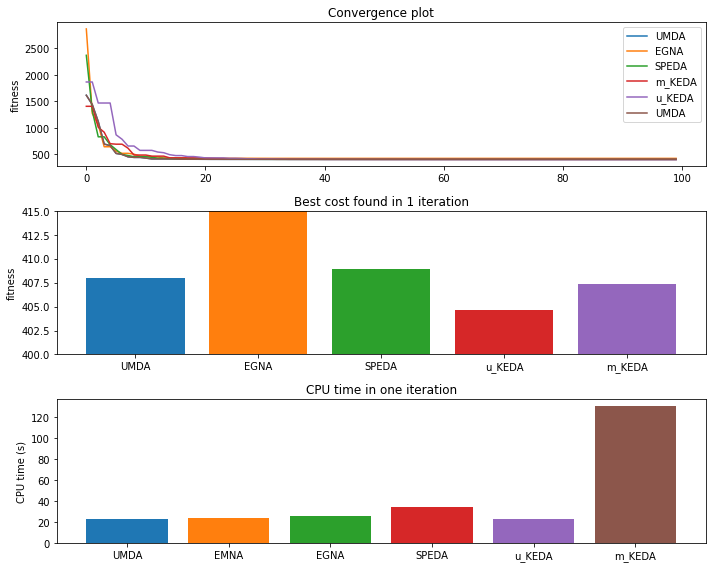

In [14]:
plt.figure(figsize=(10, 8))
plt.subplot(311)
plt.title('Convergence plot')
# plt.plot(range(max_it), result_emna.history, label='EMNA')
plt.plot(range(max_it), result_umda.history, label='UMDA')
plt.plot(range(max_it), result_egna.history, label='EGNA')
plt.plot(range(max_it), result_speda.history, label='SPEDA')
plt.plot(range(max_it), result_keda.history, label='m_KEDA')
plt.plot(range(max_it), result_u_keda.history, label='u_KEDA')
plt.plot(range(max_it), result_umda.history, label='UMDA')

plt.ylabel('fitness')

plt.legend()

plt.subplot(312)
plt.title('Best cost found in 1 iteration')
# plt.bar(0, result_emna.best_cost, label='EMNA')
plt.bar(0, result_umda.best_cost, label='UMDA')
plt.bar(1, result_egna.best_cost, label='EGNA')
plt.bar(2, result_speda.best_cost, label='SPEDA')
plt.bar(3, result_u_keda.best_cost, label='u_KEDA')
plt.bar(4, result_keda.best_cost, label='m_KEDA')

plt.ylim([400, 415])
plt.xticks([0, 1, 2, 3, 4], ['UMDA', 'EGNA', 'SPEDA', 'u_KEDA', 'm_KEDA'])
plt.ylabel('fitness')

plt.subplot(313)
plt.title('CPU time in one iteration')
plt.bar(-1, umda_time, label='UMDA')
plt.bar(0, emna_time, label='EMNA')
plt.bar(1, egna_time, label='EGNA')
plt.bar(2, speda_time, label='SPEDA')
plt.bar(3, u_keda_time, label='u_KEDA')
plt.bar(4, keda_time, label='m_KEDA')

plt.xticks([-1, 0, 1, 2, 3, 4], ['UMDA', 'EMNA', 'EGNA', 'SPEDA', 'u_KEDA', 'm_KEDA'])
plt.ylabel('CPU time (s)')

plt.tight_layout()
plt.savefig('cpu_comparison_continuous_opt.png')
plt.show()

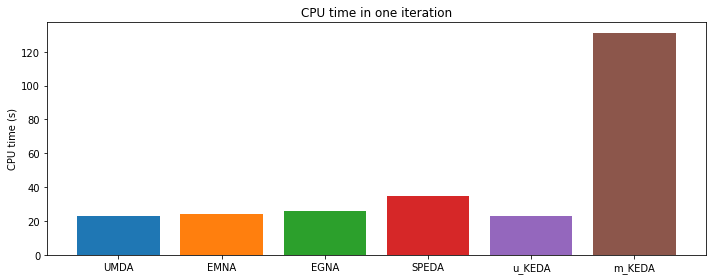

In [12]:
plt.figure(figsize=(10, 4))
plt.title('CPU time in one iteration')
plt.bar(-1, umda_time, label='UMDA')
plt.bar(0, emna_time, label='EMNA')
plt.bar(1, egna_time, label='EGNA')
plt.bar(2, speda_time, label='SPEDA')
plt.bar(3, u_keda_time, label='u_KEDA')
plt.bar(4, keda_time, label='m_KEDA')

plt.xticks([-1, 0, 1, 2, 3, 4], ['UMDA', 'EMNA', 'EGNA', 'SPEDA', 'u_KEDA', 'm_KEDA'])
plt.ylabel('CPU time (s)')

plt.tight_layout()
plt.savefig('cpu_comparison_continuous_opt.png')
plt.show()